# 이진분류 (Binary Classification)
- 당뇨병 데이터셋

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# 데이터 준비

In [73]:
!gdown https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv
To: /content/diabetes.csv
23.9kB [00:00, 25.1MB/s]       


In [74]:
diabetes = pd.read_csv('/content/diabetes.csv')
diabetes.shape

(768, 9)

In [75]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
diabetes.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [77]:
# 
y = diabetes['Outcome']
X = diabetes.drop(['Outcome'], axis=1)
X.head()                                         #input shape = 8

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [78]:
# 테스트 셋 나누기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


In [79]:
# 정규화

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
y_train = y_train.values

# 모델

In [80]:
def build_model():

    model = keras.Sequential([
        layers.Dense(units=64, activation='relu', input_shape=(8,)),      #activation='relu'가 가장 학습 잘됨
        layers.Dense(units=8, activation='relu'),
        layers.Dense(units=1, activation='sigmoid')                       #이진분류 모델은 activation을 시그모이드로 해야함 / 다중분류:소프트맥스
        ])

    loss = tf.keras.losses.BinaryCrossentropy()                           #이진분류
    adam = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(
          optimizer=adam,
          loss=loss,
          metrics=['accuracy']
          )
    
    return model


In [81]:
model = build_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                576       
                                                                 
 dense_23 (Dense)            (None, 8)                 520       
                                                                 
 dense_24 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,105
Trainable params: 1,105
Non-trainable params: 0
_________________________________________________________________


In [82]:
loss = tf.keras.losses.BinaryCrossentropy()                 #이진분류
adam = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam,
    loss=loss,
    metrics=['accuracy']
)

In [83]:
EPOCHS = 50
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_split = 0.2,
                    verbose = 1)

Epoch 1/50
16/16 [==============================] - 1s 15ms/step - loss: 0.7052 - accuracy: 0.4725 - val_loss: 0.6895 - val_accuracy: 0.6016
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6797 - accuracy: 0.6273 - val_loss: 0.6707 - val_accuracy: 0.7236
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6613 - accuracy: 0.7047 - val_loss: 0.6499 - val_accuracy: 0.7724
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6388 - accuracy: 0.7536 - val_loss: 0.6252 - val_accuracy: 0.8130
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6146 - accuracy: 0.7597 - val_loss: 0.5968 - val_accuracy: 0.8130
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5875 - accuracy: 0.7597 - val_loss: 0.5689 - val_accuracy: 0.7967
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5602 - accuracy: 0.7678 - val_loss: 0.5379 - val_accuracy: 0.7967
Epoch 8/50
16/16 [=

In [84]:
# 학습 곡선

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

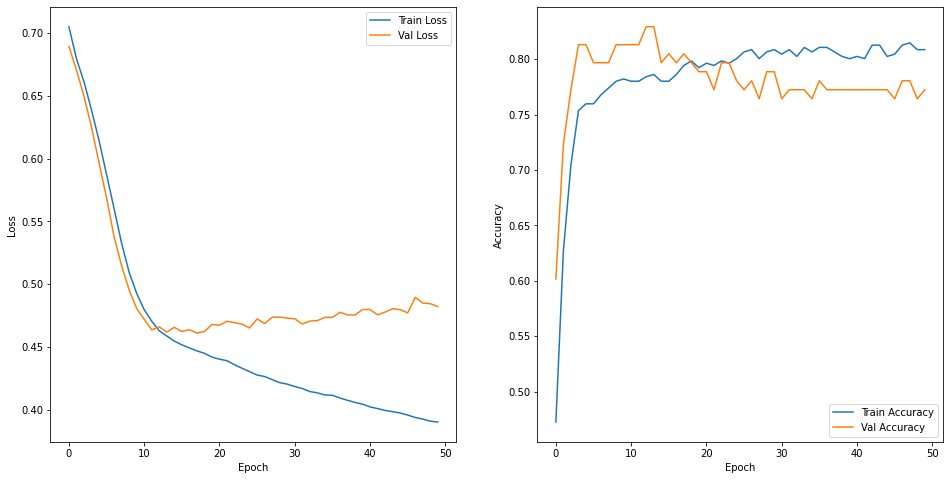

In [85]:
plot_history(history)

In [86]:
model.evaluate(X_train_s, y_train)

20/20 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8013


[0.40573248267173767, 0.8013029098510742]

In [93]:
X_test_s = scaler.transform(X_test)
y_test = y_test.values

model.evaluate(X_test_s, y_test)                            

5/5 [==============================] - 0s 10ms/step - loss: 0.4820 - accuracy: 0.7338


[0.48199403285980225, 0.7337662577629089]

In [94]:
type(y_test)

numpy.ndarray

In [95]:
# 결과 시각화 Confusion Matrix

y_pred = model.predict(X_test_s)
y_pred = y_pred.flatten()
y_pred

5/5 [==============================] - 0s 2ms/step


array([0.64828557, 0.54370266, 0.26117393, 0.46400052, 0.07879231,
       0.20591573, 0.5622155 , 0.18441144, 0.17348376, 0.27995825,
       0.14105389, 0.12722711, 0.09711788, 0.02085306, 0.35352793,
       0.13702105, 0.04439109, 0.00866883, 0.13082749, 0.95223796,
       0.18953246, 0.30894703, 0.4715395 , 0.00839319, 0.9175516 ,
       0.15883185, 0.19488466, 0.00738494, 0.5378259 , 0.48699588,
       0.3793034 , 0.15668388, 0.53686756, 0.9277355 , 0.11865517,
       0.227959  , 0.23195527, 0.20291236, 0.06915162, 0.08791681,
       0.01575514, 0.5612314 , 0.7553986 , 0.02553556, 0.8534099 ,
       0.5867629 , 0.25573948, 0.7067919 , 0.22326927, 0.3300868 ,
       0.0950801 , 0.17411707, 0.01088317, 0.01958468, 0.194628  ,
       0.18443117, 0.04012229, 0.43164828, 0.00481951, 0.58484256,
       0.49190193, 0.1841878 , 0.2754029 , 0.18137525, 0.09368199,
       0.17094629, 0.7738672 , 0.50308853, 0.862986  , 0.00937914,
       0.73190874, 0.13913886, 0.24887052, 0.4209521 , 0.53849

In [96]:
y_pred = (y_pred > 0.5).astype(int)                                #y_pred > 0.5 기준 [1,0]으로 변경
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [97]:
y_test

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1])

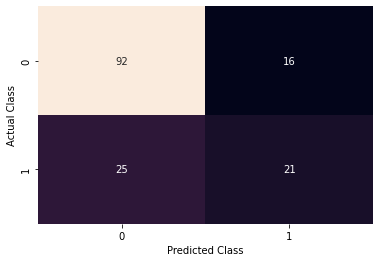

In [98]:
# y_pred, y_test

from sklearn.metrics import confusion_matrix
import seaborn as sns

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cbar=False)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()